# ADULT_KNN_CLASSIFICATION_V2_Full

###  Import Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Step1: Import Dataset

In [4]:
# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult= pd.read_csv('Adult.csv', header=None, names=columns, skipinitialspace=True)

In [5]:
adult.shape

(32561, 15)

In [6]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [7]:
# Drop column that not nessesary

adult = adult.drop(columns=['hours-per-week','fnlwgt'])

In [8]:
list(adult.columns)

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'native-country',
 'income']

In [9]:
adult.describe().round(2)

,age,education-num,capital-gain,capital-loss
count,32561.00,32561.00,32561.00,32561.00
mean,38.58,10.08,1077.65,87.30
std,13.64,2.57,7385.29,402.96
min,17.00,1.00,0.00,0.00
25%,28.00,9.00,0.00,0.00
50%,37.00,10.00,0.00,0.00
75%,48.00,12.00,0.00,0.00
max,90.00,16.00,99999.00,4356.00


In [10]:
adult.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'native-country', 'income'],
      dtype='object')

### Step2: Handle missing data

In [11]:
adult.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
native-country    0
income            0
dtype: int64

In [12]:
adult=adult.replace('?',np.nan)

In [13]:
adult.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
native-country     583
income               0
dtype: int64

In [14]:
# Found Missing: workclass=1836, occupation=1843, native-country=583
# Total missing = 4,262 point

In [15]:
# I will remove rows that have missing value in workclass feature.
adult = adult[adult["workclass"].notnull()]

In [16]:
# Recheck total remaining
adult.isnull().sum()

age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation          7
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
native-country    556
income              0
dtype: int64

In [17]:
# I will remove rows that have missing value in occupation and native-country feature.
adult = adult[adult["occupation"].notnull()]
adult = adult[adult["native-country"].notnull()]

In [18]:
adult.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
native-country    0
income            0
dtype: int64

In [19]:
adult.shape

(30162, 13)

In [20]:
print("After removing the missing value:")
print("Training set has {} samples.".format(adult.shape[0]))
print("We loss data after remove missing value",((32561-30162)/32561)*100,"%")

After removing the missing value:
Training set has 30162 samples.
We loss data after remove missing value 7.367709836921471 %


### Step3: EDA

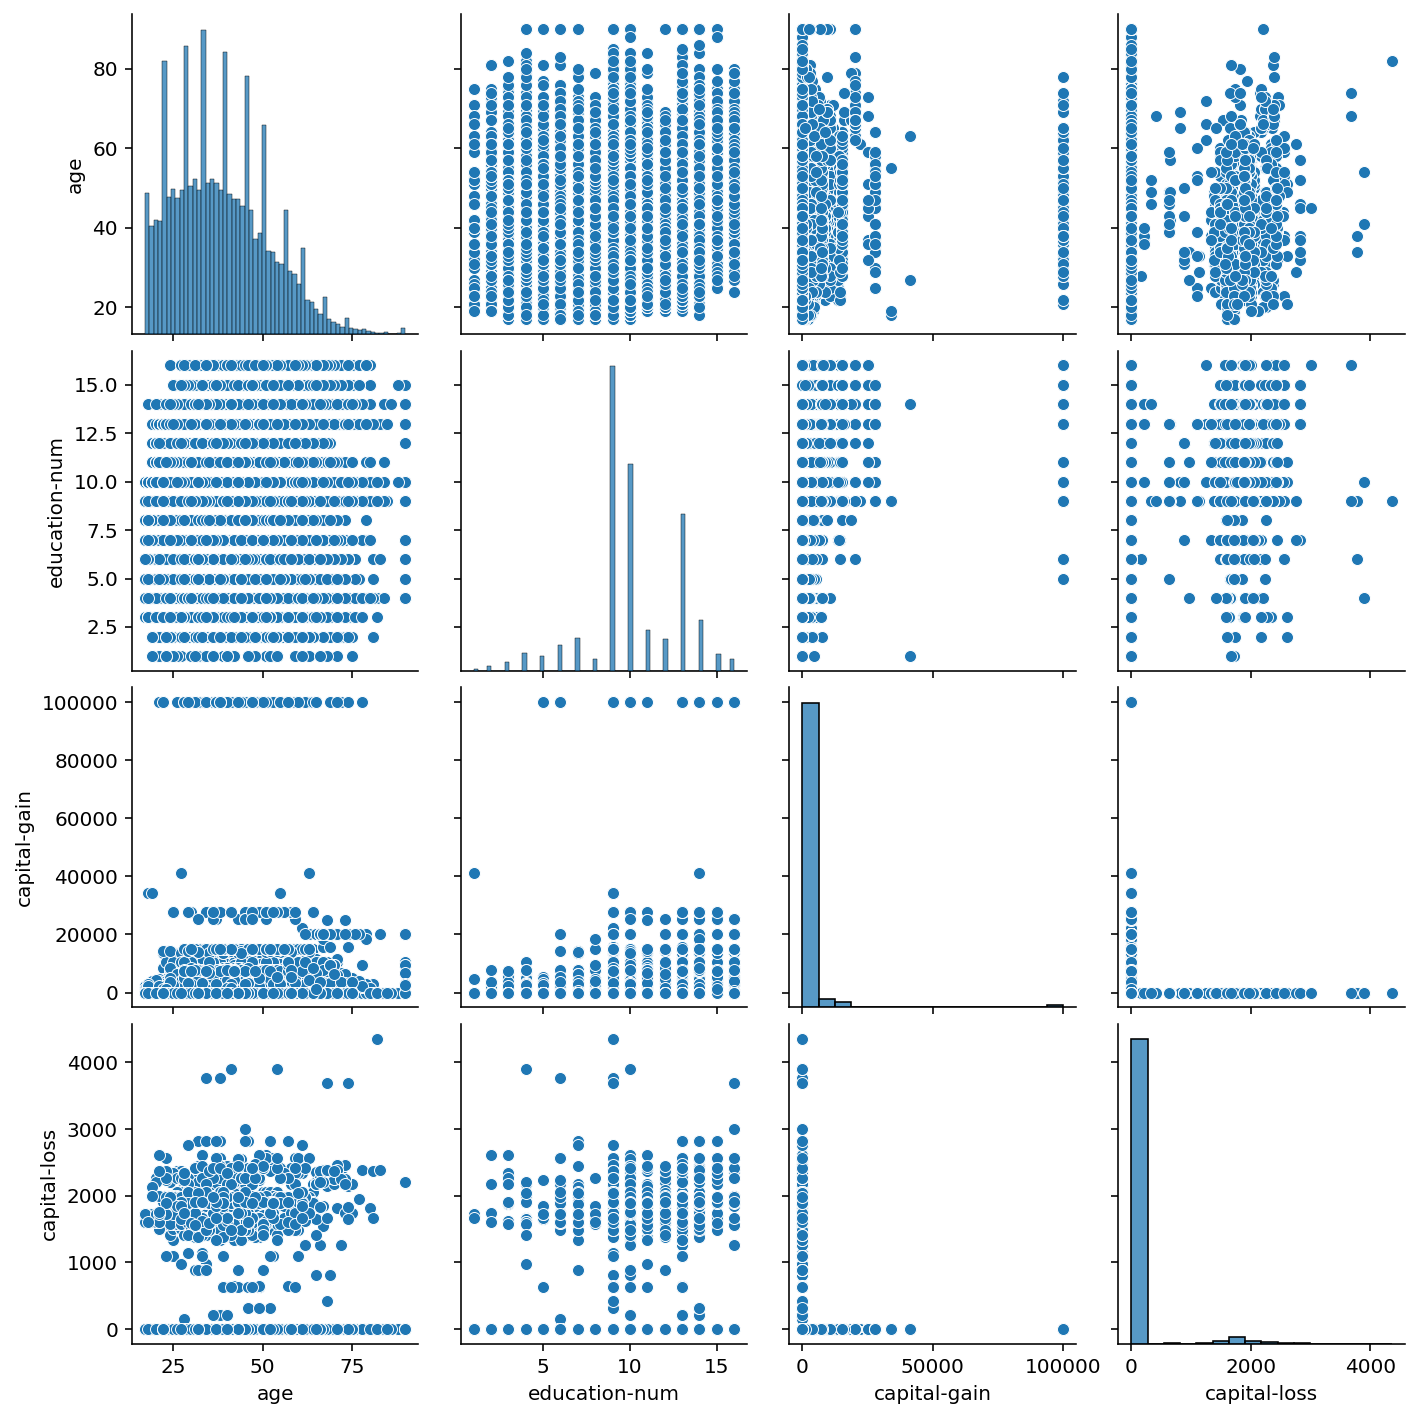

In [21]:
# Overview of the data
sns.pairplot(adult)

<AxesSubplot:>

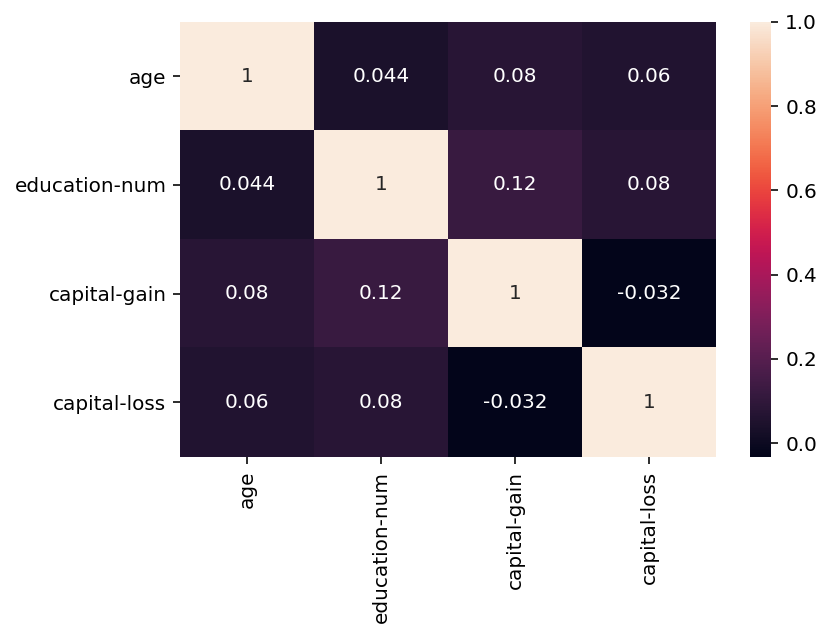

In [23]:
sns.heatmap(adult.corr(), annot=True)

### Step4: Outlier Removal

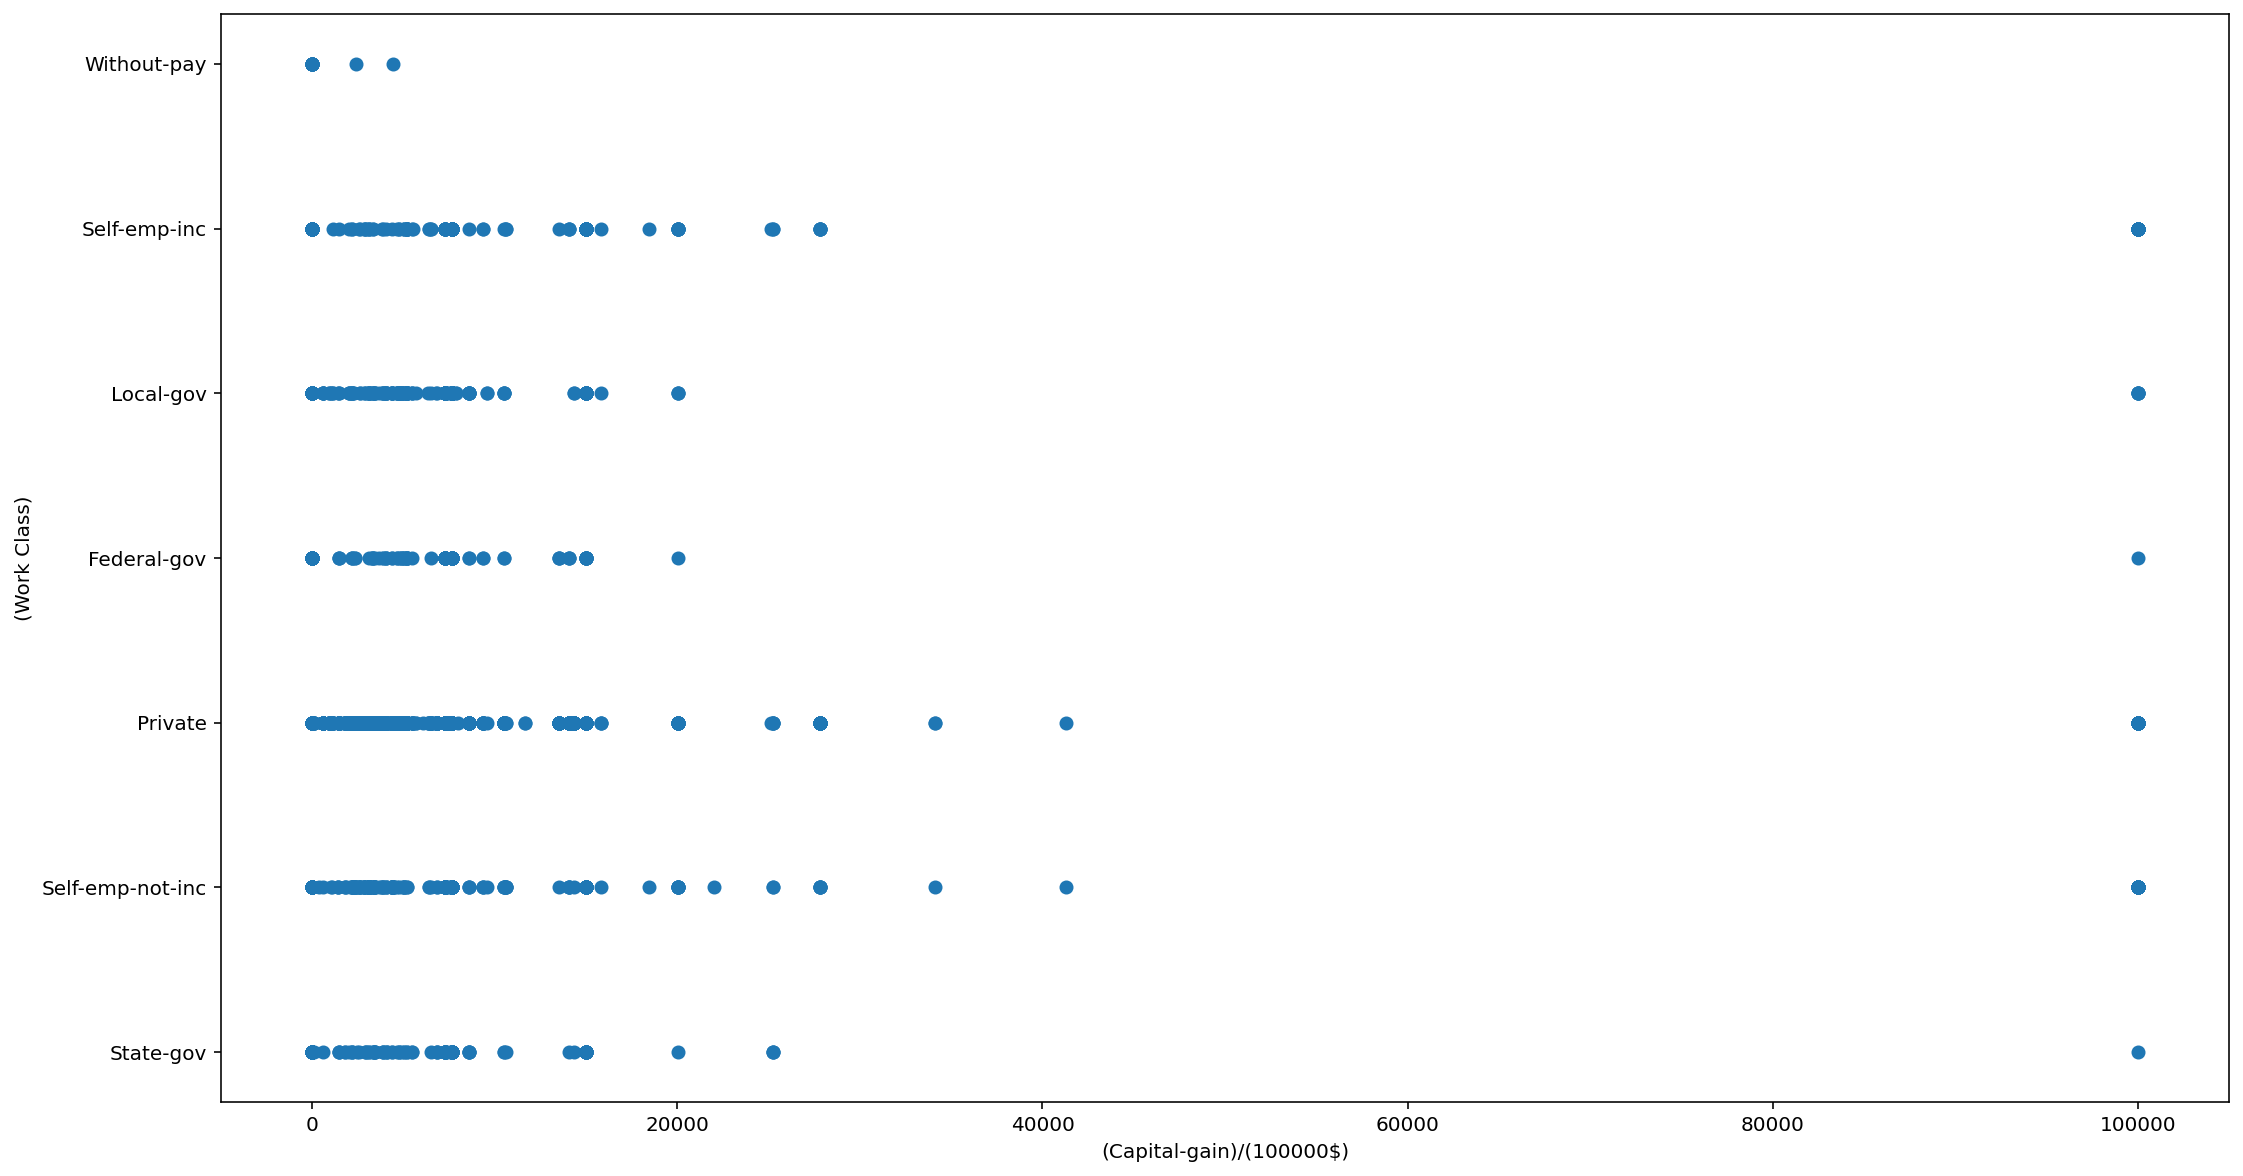

In [24]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(adult['capital-gain'], adult['workclass'])
  
# x-axis label
ax.set_xlabel('(Capital-gain)/(100000$)')
  
# y-axis label
ax.set_ylabel('(Work Class)')
plt.show()

In [25]:
# Found 99999 in Capital gain is Extream Value or Outlier
# We will use mean value to impute this outliers

adult.describe().round(2) 

,age,education-num,capital-gain,capital-loss
count,30162.00,30162.00,30162.00,30162.00
mean,38.44,10.12,1092.01,88.37
std,13.13,2.55,7406.35,404.30
min,17.00,1.00,0.00,0.00
25%,28.00,9.00,0.00,0.00
50%,37.00,10.00,0.00,0.00
75%,47.00,13.00,0.00,0.00
max,90.00,16.00,99999.00,4356.00


In [26]:
# Greater than 50000 replace to mean value.

adult['capital-gain'] = np.where(adult['capital-gain'] > 50000, 1092, adult['capital-gain'])

In [27]:
adult.sort_values("capital-gain", ascending = False).head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income
20176,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,Male,41310,0,United-States,<=50K
6433,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,Mexico,<=50K
15376,55,Self-emp-not-inc,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,34095,0,United-States,<=50K
7186,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,34095,0,United-States,<=50K
4568,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,Male,34095,0,United-States,<=50K


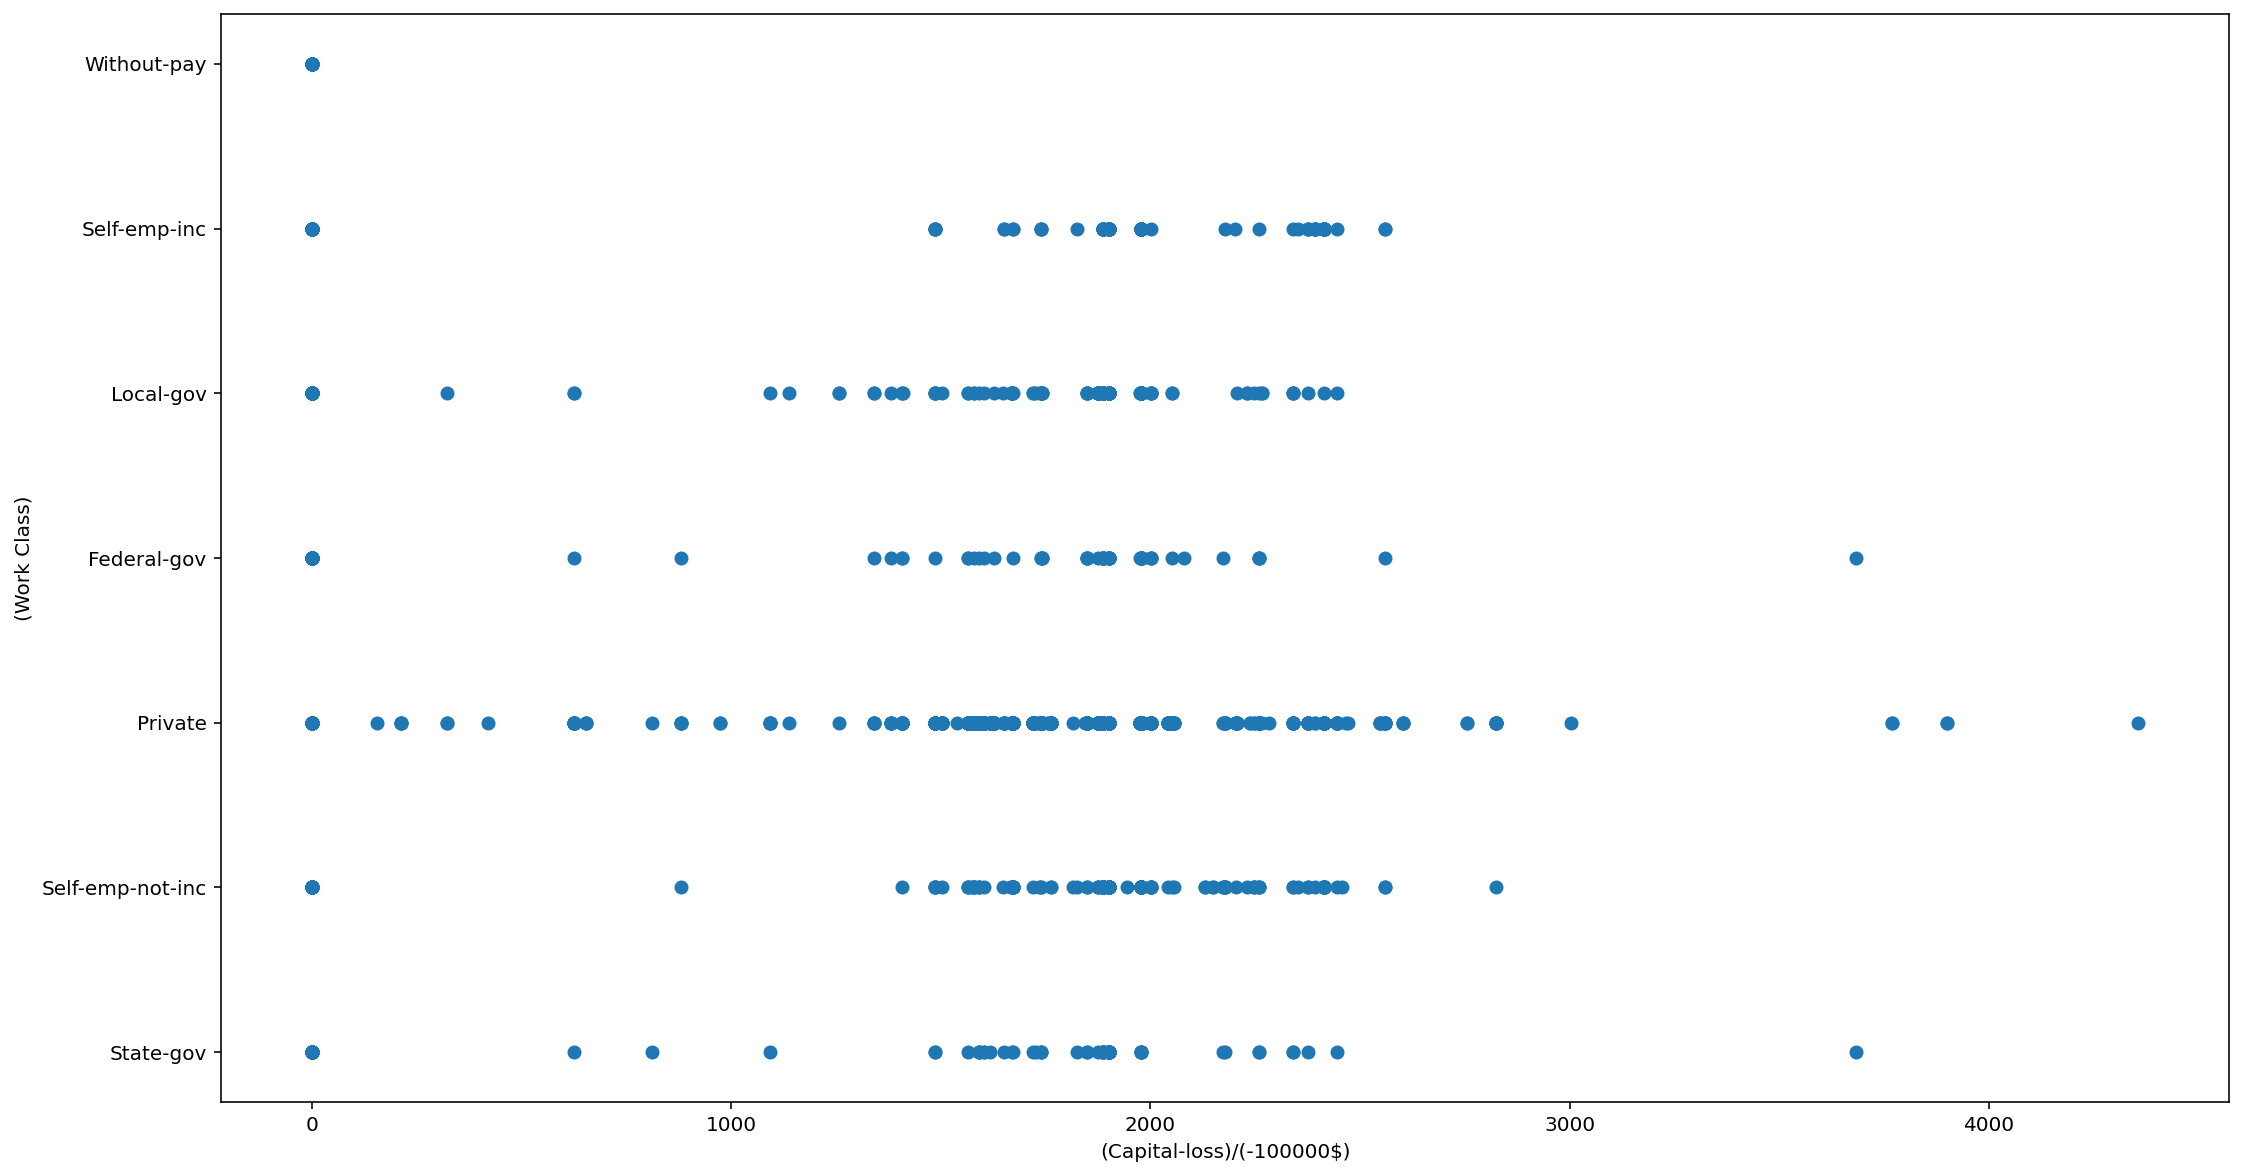

In [28]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(adult['capital-loss'], adult['workclass'])
  
# x-axis label
ax.set_xlabel('(Capital-loss)/(-100000$)')
  
# y-axis label
ax.set_ylabel('(Work Class)')
plt.show()

In [29]:
# For Capital loss ,we not do any more because It has not many outliers.

In [30]:
# Greater than 50000 replace to mean value.

adult['capital-loss'] = np.where(adult['capital-loss'] > 3000, 89, adult['capital-loss'])

In [31]:
adult.sort_values("capital-loss", ascending = False).head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income
10965,52,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,United-States,>50K
22845,57,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,2824,United-States,>50K
5713,38,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,United-States,>50K
13479,32,Private,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,United-States,>50K
18797,46,Private,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,United-States,>50K


In [32]:
# Total number of records
n_records = adult.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = np.sum(adult.income=='>50K')

# Number of records where individual's incomre is less than $50,000
n_at_most_50k = np.sum(adult.income=='<=50K')

# Percentage of indiciduals whose income is more than $50,000
greater_percentage = round(np.mean(adult.income=='>50K')*100.00, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percentage))

Total number of records: 30162
Individuals making more than $50,000: 7508
Individuals making at most $50,000: 22654
Percentage of individuals making more than $50,000: 24.89%


## Data Transformation

### Step 5: Separating categorical and numerical data

In [33]:
print("Numerical Data: 'age', 'capital-gain', 'capital-loss','education-num'")
print("Categorical Data: 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','sex', 'native-country'")
print("Traget feature: 'income'")

Numerical Data: 'age', 'capital-gain', 'capital-loss','education-num'
Categorical Data: 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','sex', 'native-country'
Traget feature: 'income'


In [34]:
target_feat = adult[['income']]

In [35]:
num_feat = adult[['age', 'capital-gain', 'capital-loss','education-num']]

In [36]:
cat_feat = adult[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','sex', 'native-country']]

In [37]:
target_feat.head(2)

,income
0,<=50K
1,<=50K


In [38]:
num_feat.head(2)

,age,capital-gain,capital-loss,education-num
0,39,2174,0,13
1,50,0,0,13


In [39]:
cat_feat.head(2)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


### Step6: Normalizing Numerical Features

In [40]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

In [41]:
num_column = num_feat.dtypes[num_feat.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

minmax_transform_feat = pd.DataFrame(data = num_feat)
minmax_transform_feat[num_column] = scaler.fit_transform(num_feat[num_column])

# Show an example of a record with scaling applied
display(minmax_transform_feat.head())

,age,capital-gain,capital-loss,education-num
0,0.301370,0.052626,0.0,0.800000
1,0.452055,0.000000,0.0,0.800000
2,0.287671,0.000000,0.0,0.533333
3,0.493151,0.000000,0.0,0.400000
4,0.150685,0.000000,0.0,0.800000


In [42]:
minmax_transform_feat.reset_index(drop=True, inplace=True)

In [43]:
minmax_transform_feat.shape

(30162, 4)

### Step7: Categorical Features

### Data reduction

In [44]:
# Sex Feature 
cat_feat['sex'] = cat_feat['sex'].replace({"Female": 0, "Male": 1})

In [45]:
# Workclass Feature: move Without-pay','Never-worked' to group of Private.
cat_feat['workclass']=cat_feat['workclass'].replace({'Without-pay':'Private', 'Never-worked':'Private'})

In [46]:
# Education Feature: Regroup.
cat_feat['education']=cat_feat['education'].replace({'Some-college': 'Vocational',
                                                     'Assoc-voc' : 'Vocational', 
                                                     '5th-6th':'Scholl', 
                                                     'Preschool':'Scholl',
                                                     '1st-4th':'Scholl',
                                                     '10th':'Scholl',
                                                     '9th':'Scholl',
                                                     '7th-8th':'Scholl',
                                                     '12th':'Scholl',
                                                     '11th':'Scholl',
                                                     'HS-grad':'Scholl',
                                                     'Prof-school':'Scholl',
                                                     'Assoc-acdm':'Scholl' 
                                                     })

In [47]:
# Marital-status: classify to 'married' and 'not-married'
cat_feat['marital-status']=cat_feat['marital-status'].replace({'Married-civ-spouse':'Married',
                                                               'Married-spouse-absent':'Married',
                                                               'Married-AF-spouse':'Married',
                                                               'Divorced':'Not-Married',
                                                               'Never-married':'Not-Married',
                                                               'Separated':'Not-Married',
                                                               'Widowed':'Not-Married'})

In [48]:
# Relationship: classify to 'Family' and 'Not-family'
cat_feat['relationship']=cat_feat['relationship'].replace({'Married-civ-spouse':'Married',
                                                               'Married-spouse-absent':'Married',
                                                               'Married-AF-spouse':'Married',
                                                               'Divorced':'Not-Married',
                                                               'Never-married':'Not-Married',
                                                               'Separated':'Not-Married',
                                                               'Widowed':'Not-Married'})

In [49]:
# Native-country Feature: regroup country to continent.
cat_feat['native-country']=cat_feat['native-country'].replace({'United-States': 'Europe', 
                                                     'Cambodia' :'Asia',  
                                                     'England':'Europe', 
                                                     'Puerto-Rico':'North America',
                                                     'Canada':'North America',
                                                     'Germany':'Europe',
                                                     'Outlying-US(Guam-USVI-etc)':'Australia',
                                                     'India':'Asia',
                                                     'Japan':'Asia', 
                                                     'Greece':'Europe',
                                                     'South':'South America',
                                                     'China':'Asia', 
                                                     'Cuba':'North America',
                                                     'Iran' : 'Asia', 
                                                     'Honduras':'North America', 
                                                     'Philippines':'Asia', 
                                                     'Italy':'Europe',
                                                     'Poland':'Europe',
                                                     'Jamaica':'North America',
                                                     'Vietnam':'Asia', 
                                                     'Mexico':'North America',
                                                     'Portugal':'Europe',
                                                     'Ireland':'Europe',
                                                     'France':'Europe',
                                                     'Dominican-Republic':'North America',
                                                     'Laos':'Asia', 
                                                     'Ecuador':'South America',
                                                     'Taiwan':'Asia', 
                                                     'Haiti':'North America',
                                                     'Columbia':'Asia', 
                                                     'Hungary':'Europe',
                                                     'Guatemala':'North America',
                                                     'Nicaragua':'North America',
                                                     'Scotland':'Europe',
                                                     'Thailand':'Asia', 
                                                     'Yugoslavia':'Europe',
                                                     'El-Salvador':'North America',
                                                     'Trinadad&Tobago':'South America',
                                                     'Peru':'South America',
                                                     'Hong':'Asia', 
                                                     'Holand-Netherlands.':'Europe',        
                                                     })

In [50]:
cat_feat.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Not-Married,Adm-clerical,Not-in-family,White,1,Europe
1,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,1,Europe
2,Private,Scholl,Not-Married,Handlers-cleaners,Not-in-family,White,1,Europe
3,Private,Scholl,Married,Handlers-cleaners,Husband,Black,1,Europe
4,Private,Bachelors,Married,Prof-specialty,Wife,Black,0,North America
5,Private,Masters,Married,Exec-managerial,Wife,White,0,Europe
6,Private,Scholl,Married,Other-service,Not-in-family,Black,0,North America
7,Self-emp-not-inc,Scholl,Married,Exec-managerial,Husband,White,1,Europe
8,Private,Masters,Not-Married,Prof-specialty,Not-in-family,White,0,Europe
9,Private,Bachelors,Married,Exec-managerial,Husband,White,1,Europe


### Using Pandas for create dummy variables

In [51]:
cat_feat_encoding = pd.get_dummies(data=cat_feat)

In [52]:
cat_feat_encoding.info

<bound method DataFrame.info of        sex  workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0        1                      0                    0                  0   
1        1                      0                    0                  0   
2        1                      0                    0                  1   
3        1                      0                    0                  1   
4        0                      0                    0                  1   
...    ...                    ...                  ...                ...   
32556    0                      0                    0                  1   
32557    1                      0                    0                  1   
32558    0                      0                    0                  1   
32559    1                      0                    0                  1   
32560    0                      0                    0                  0   

       workclass_Self-emp-inc  workclass_Se

In [53]:
cat_feat_encoding.head(5)

,sex,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_Bachelors,education_Doctorate,education_Masters,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Asia,native-country_Australia,native-country_Europe,native-country_Holand-Netherlands,native-country_North America,native-country_South America
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [54]:
cat_feat_encoding.reset_index(drop=True, inplace=True)

### Using One hot encoding to Target feature

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [57]:
encoded_target_feat = encoder.fit_transform(target_feat)

In [58]:
encoded_target_feat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [59]:
# Generate OHE dataframe and concatenate it with the numerical dataframe later
target_features = pd.DataFrame(encoded_target_feat)
target_features.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [60]:
target_features.rename(columns={0: '<=50K', 1: '>50K'}, inplace=True)

In [61]:
target_features.head(5)

,<=50K,>50K
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [62]:
target_features = target_features.drop(columns=['<=50K'])

In [63]:
target_features.head(5)

,>50K
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [64]:
target_features.reset_index(drop=True, inplace=True)

In [65]:
target_features.shape

(30162, 1)

### Step8: Summary Data preprocessing

In [66]:
# Concat all numerical feature to DataFrame
adult_pre = pd.concat((target_features, minmax_transform_feat,cat_feat_encoding),axis=1)


In [67]:
#check shape of Dataset
adult_pre.shape

(30162, 50)

In [68]:
# The pre-processing dataset in csv format, "adult_pre.csv"
adult_pre.to_csv('Adult_pre.csv')

In [69]:
adult_pre.head(10)

,>50K,age,capital-gain,capital-loss,education-num,sex,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Asia,native-country_Australia,native-country_Europe,native-country_Holand-Netherlands,native-country_North America,native-country_South America
0,0.0,0.301370,0.052626,0.0,0.800000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0.0,0.452055,0.000000,0.0,0.800000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0.0,0.287671,0.000000,0.0,0.533333,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0.0,0.493151,0.000000,0.0,0.400000,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0.0,0.150685,0.000000,0.0,0.800000,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,0.0,0.273973,0.000000,0.0,0.866667,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0.0,0.438356,0.000000,0.0,0.266667,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
7,1.0,0.479452,0.000000,0.0,0.533333,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8,1.0,0.191781,0.340934,0.0,0.866667,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
9,1.0,0.342466,0.125345,0.0,0.800000,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [70]:
adult_pre.isnull().sum()

>50K                                 0
age                                  0
capital-gain                         0
capital-loss                         0
education-num                        0
sex                                  0
workclass_Federal-gov                0
workclass_Local-gov                  0
workclass_Private                    0
workclass_Self-emp-inc               0
workclass_Self-emp-not-inc           0
workclass_State-gov                  0
education_Bachelors                  0
education_Doctorate                  0
education_Masters                    0
education_Scholl                     0
education_Vocational                 0
marital-status_Married               0
marital-status_Not-Married           0
occupation_Adm-clerical              0
occupation_Armed-Forces              0
occupation_Craft-repair              0
occupation_Exec-managerial           0
occupation_Farming-fishing           0
occupation_Handlers-cleaners         0
occupation_Machine-op-ins

In [71]:
list(adult_pre.columns)

['>50K',
 'age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'sex',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'education_Bachelors',
 'education_Doctorate',
 'education_Masters',
 'education_Scholl',
 'education_Vocational',
 'marital-status_Married',
 'marital-status_Not-Married',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Amer-India

In [72]:
X = adult_pre[['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'sex',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'education_Bachelors',
 'education_Doctorate',
 'education_Masters',
 'education_Scholl',
 'education_Vocational',
 'marital-status_Married',
 'marital-status_Not-Married',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'native-country_Asia',
 'native-country_Australia',
 'native-country_Europe',
 'native-country_Holand-Netherlands',
 'native-country_North America',
 'native-country_South America']]

In [73]:
y = adult_pre[['>50K']]

###  Analytic Report

##### 1. Which feature is the class target / dependent variables?
- Income feature is class target
. 
##### 2. How many missing values in this data set? (list for each features)
- workclass:1836, occupation:1843, native-country:583, Total: 4,262 Missing value in Trian data.
. 
##### 3. How did you remedy the missing value and outliers (show steps)
* 1.For missing value: we had remove row that have missing value because its just have about 7.95% (2,399 rows in Train data)and  7.5%(1,221 rows in Train data).
* 2.We found 99,999 USD (159 values)in capital-gain feature, we changed its by mean value.
. 
##### 4. What data pre-processing (i.e. normalization, discretization) techniques you have use in for this data set.
- 1. In numerical feature, I used normalization min-max scale it transform its.
- 2. In categorical data, some feature have many item and when we classify it's make a lot of feature. We will reshaped data in some feature see as below:
.
* education: Doctors, Masters, Bacherlors, Vocational, School.
* marital-status: Married, Not-marrie.
* relationship: Family, Not-Family
* native-country: Africa, Antarctica, Asia, Australia, Europe, North America, South America.
* I used function get dummies of Pandas to generate encoding(Norminal: 0 and 1)
.
- 3. In traget feature: I used OneHotEncoder from sklearn.preprocessing to transform '<=50K'to 0, '>50K' to 1.
.
#### Question 6: Answer is in Workshop5
5. Use Weka software, convert you pre-processed data to .arff and use KNN algorithm or IBK for datamining tool.
6. What is the test accuracy did you get after you applied the adult.test (before pre-process and after pre-processing)?

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Report by Nattawat W.